# CC

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:

def fourierImage(image):
    return np.log10(np.abs(np.fft.fft2(image)))

def supprimer_coefficients_bords(img, pourcentage):
    f = np.fft.fft2(img)
    rows, cols = img.shape
    crop_rows = int((pourcentage) * rows / 2)
    crop_cols = int((pourcentage) * cols / 2)
    indices_rows = np.arange(crop_rows, rows - crop_rows)
    indices_cols = np.arange(crop_cols, cols - crop_cols)
    new_f = np.zeros(img.shape, dtype=complex)
    new_f[indices_rows[:, None],
          indices_cols] = f[indices_rows[:, None], indices_cols]
    img_back = np.fft.ifft2(new_f).real
    return new_f, img_back

def getMagnitudeImage(f):
    magnitude = np.abs(f)
    magnitude_image = np.log(1 + magnitude)
    return magnitude_image


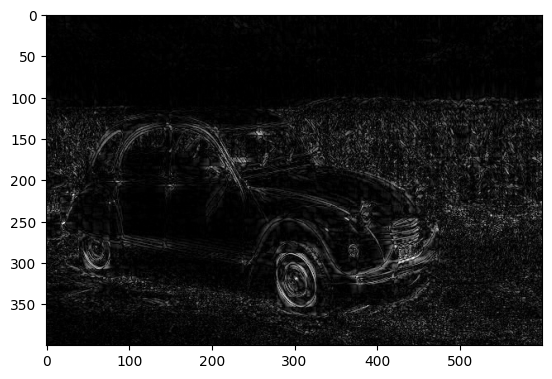

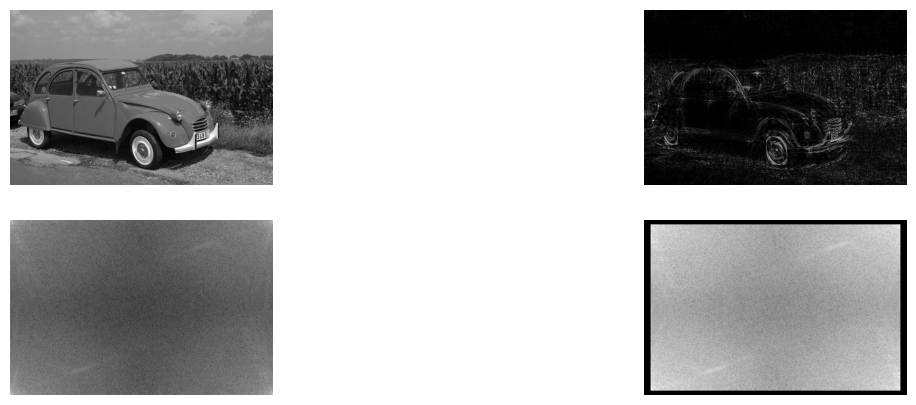

In [3]:
image = plt.imread('assets/voiture.jpg')
f = np.fft.fft2(image)

f_bord, img_back_bord = supprimer_coefficients_bords(image, 0.05)

plt.imshow(getMagnitudeImage(f_bord), cmap='gray')
plt.savefig('assets/spectre_altere.jpg')
plt.imshow(np.uint8(np.abs(img_back_bord)), cmap='Greys_r')
plt.savefig('assets/voiiture_contours.jpg')

fig, (axis) = plt.subplots(2, 2, figsize=(15, 5))
axis[0][0].imshow(image, cmap='gray')
axis[1][0].imshow(getMagnitudeImage(f), cmap='gray')
axis[0][1].imshow(np.uint8(np.abs(img_back_bord)), cmap='Greys_r')
axis[1][1].imshow(getMagnitudeImage(f_bord), cmap='gray')

for axs in axis:
    for ax in axs:
        ax.axis('off')

plt.show()
